<a href="https://colab.research.google.com/github/beyzaturku/2209/blob/main/high_alt_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import json
from glob import glob

json_folder = "/content/drive/MyDrive/high_alt/high_alt_annotations"

output_folder = "/content/drive/MyDrive/high_alt/yolo_labels"
os.makedirs(output_folder, exist_ok=True)

class_list = ["car", "vehicle", "truck", "bus"]

json_files = glob(os.path.join(json_folder, "*.json"))

for json_file in json_files:
    with open(json_file, "r") as f:
        data = json.load(f)

    img_width = data["size"]["width"]
    img_height = data["size"]["height"]

    base_name = os.path.splitext(os.path.basename(json_file))[0]

    txt_file_path = os.path.join(output_folder, base_name + ".txt")

    with open(txt_file_path, "w") as out_file:
        for obj in data.get("objects", []):
            class_title = obj.get("classTitle", "").lower()
            if class_title not in class_list:
                print(f"Sınıf '{class_title}' JSON: {json_file} dosyasında bulunamadı. Atlanıyor.")
                continue

            class_id = class_list.index(class_title)

            exterior_points = obj.get("points", {}).get("exterior", [])
            if len(exterior_points) != 2:
                print(f"Uyarı: Beklenmeyen nokta sayısı {len(exterior_points)} JSON: {json_file}")
                continue

            x1, y1 = exterior_points[0]
            x2, y2 = exterior_points[1]

            x_center = (x1 + x2) / 2.0
            y_center = (y1 + y2) / 2.0
            bbox_width = x2 - x1
            bbox_height = y2 - y1

            x_center_norm = x_center / img_width
            y_center_norm = y_center / img_height
            w_norm = bbox_width / img_width
            h_norm = bbox_height / img_height

            line = f"{class_id} {x_center_norm:.6f} {y_center_norm:.6f} {w_norm:.6f} {h_norm:.6f}\n"
            out_file.write(line)

print("Tüm JSON dosyaları YOLO formatına dönüştürüldü!")

Tüm JSON dosyaları YOLO formatına dönüştürüldü!


In [3]:
import os
import shutil
import random

image_dir = "/content/drive/MyDrive/high_alt/high_alt_images"
label_dir = "/content/drive/MyDrive/high_alt/yolo_labels"

train_img_dir = "/content/drive/MyDrive/high_alt_object_detection/images/train"
val_img_dir = "/content/drive/MyDrive/high_alt_object_detection/images/val"
train_label_dir = "/content/drive/MyDrive/high_alt_object_detection/labels/train"
val_label_dir = "/content/drive/MyDrive/high_alt_object_detection/labels/val"

os.makedirs(train_img_dir, exist_ok=True)
os.makedirs(val_img_dir, exist_ok=True)
os.makedirs(train_label_dir, exist_ok=True)
os.makedirs(val_label_dir, exist_ok=True)

image_files = [f for f in os.listdir(image_dir) if f.endswith(".jpg") or f.endswith(".png")]

random.shuffle(image_files)
split_index = int(len(image_files) * 0.8)
train_files = image_files[:split_index]
val_files = image_files[split_index:]

for file in train_files:
    shutil.move(os.path.join(image_dir, file), os.path.join(train_img_dir, file))
    label_file = file.replace(".jpg", ".txt").replace(".png", ".txt")
    if os.path.exists(os.path.join(label_dir, label_file)):
        shutil.move(os.path.join(label_dir, label_file), os.path.join(train_label_dir, label_file))

for file in val_files:
    shutil.move(os.path.join(image_dir, file), os.path.join(val_img_dir, file))
    label_file = file.replace(".jpg", ".txt").replace(".png", ".txt")
    if os.path.exists(os.path.join(label_dir, label_file)):
        shutil.move(os.path.join(label_dir, label_file), os.path.join(val_label_dir, label_file))

print("✅ Veri seti başarıyla train ve val olarak ayrıldı!")

✅ Veri seti başarıyla train ve val olarak ayrıldı!


In [4]:
import os
import shutil

image_train_dir = "/content/drive/MyDrive/high_alt_object_detection/images/train"
image_val_dir = "/content/drive/MyDrive/high_alt_object_detection/images/val"

label_source_dir = "/content/drive/MyDrive/high_alt/yolo_labels"
label_train_dir = "/content/drive/MyDrive/high_alt_object_detection/labels/train"
label_val_dir = "/content/drive/MyDrive/high_alt_object_detection/labels/val"

os.makedirs(label_train_dir, exist_ok=True)

train_images = os.listdir(image_train_dir)

copied_files = []

for img_file in train_images:
    img_name, _ = os.path.splitext(img_file)
    label_file = img_name + ".jpg.txt"

    src_path = os.path.join(label_source_dir, label_file)
    dest_path = os.path.join(label_train_dir, img_name + ".txt")

    if os.path.exists(src_path):
        shutil.copy(src_path, dest_path)
        copied_files.append(img_name + ".txt")

if copied_files:
    print("✅ Başarıyla kopyalanan dosyalar:")
else:
    print("⚠️ Hiçbir dosya kopyalanmadı. Dosya adlarını kontrol et!")

✅ Başarıyla kopyalanan dosyalar:


In [5]:
import os
import shutil

image_train_dir = "/content/drive/MyDrive/high_alt_object_detection/images/train"
image_val_dir = "/content/drive/MyDrive/high_alt_object_detection/images/val"

label_source_dir = "/content/drive/MyDrive/high_alt/yolo_labels"
label_train_dir = "/content/drive/MyDrive/high_alt_object_detection/labels/train"
label_val_dir = "/content/drive/MyDrive/high_alt_object_detection/labels/val"

os.makedirs(label_val_dir, exist_ok=True)

train_images = os.listdir(image_val_dir)

copied_files = []

for img_file in train_images:
    img_name, _ = os.path.splitext(img_file)
    label_file = img_name + ".jpg.txt"

    src_path = os.path.join(label_source_dir, label_file)
    dest_path = os.path.join(label_val_dir, img_name + ".txt")

    if os.path.exists(src_path):
        shutil.copy(src_path, dest_path)
        copied_files.append(img_name + ".txt")

if copied_files:
    print("✅ Başarıyla kopyalanan dosyalar:")
else:
    print("⚠️ Hiçbir dosya kopyalanmadı. Dosya adlarını kontrol et!")

✅ Başarıyla kopyalanan dosyalar:


### YOLO'ya uygun olması için data.yaml dosyası oluşturulur

In [8]:
yaml_content = """train: /content/drive/MyDrive/high_alt_object_detection/images/train
val: /content/drive/MyDrive/high_alt_object_detection/images/val

nc: 4
names: ["car", "vehicle", "truck", "bus"]
"""

yaml_path = "/content/drive/MyDrive/high_alt_object_detection/data.yaml"

with open(yaml_path, "w") as file:
    file.write(yaml_content)

print(f"✅ data.yaml başarıyla kaydedildi: {yaml_path}")

✅ data.yaml başarıyla kaydedildi: /content/drive/MyDrive/high_alt_object_detection/data.yaml


In [11]:
!cat /content/drive/MyDrive/high_alt_object_detection/data.yaml

train: /content/drive/MyDrive/high_alt_object_detection/images/train
val: /content/drive/MyDrive/high_alt_object_detection/images/val

nc: 4
names: ["car", "vehicle", "truck", "bus"]


### Model Eğitimi

In [12]:
!pip install ultralytics
!pip install tensorboard

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [13]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

results = model.train(
    data="/content/drive/MyDrive/high_alt_object_detection/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    project="/content/drive/MyDrive/high_alt_object_detection/training_logs",
    name="yolov8_high_alt",
    save=True,
    save_period=5,
    val=True
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 348MB/s]

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22693MiB)


engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/high_alt_object_detection/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=5, cache=False, device=None, workers=8, project=/content/drive/MyDrive/high_alt_object_detection/training_logs, name=yolov8_high_alt, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

100%|██████████| 755k/755k [00:00<00:00, 112MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 309MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/high_alt_object_detection/labels/train... 281 images, 0 backgrounds, 0 corrupt: 100%|██████████| 281/281 [00:12<00:00, 22.47it/s] 


train: New cache created: /content/drive/MyDrive/high_alt_object_detection/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/high_alt_object_detection/labels/val... 71 images, 0 backgrounds, 0 corrupt: 100%|██████████| 71/71 [00:08<00:00,  8.67it/s]

val: New cache created: /content/drive/MyDrive/high_alt_object_detection/labels/val.cache


Plotting labels to /content/drive/MyDrive/high_alt_object_detection/training_logs/yolov8_high_alt/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/high_alt_object_detection/training_logs/yolov8_high_alt
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.47G      2.537      4.156      1.018        215        640: 100%|██████████| 18/18 [00:03<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]

                   all         71        925      0.004     0.0247     0.0046    0.00137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.34G      2.314      1.882     0.9194        218        640: 100%|██████████| 18/18 [00:01<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.79it/s]


                   all         71        925     0.0353      0.306      0.268     0.0901

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.18G      2.139      1.556     0.8988        220        640: 100%|██████████| 18/18 [00:01<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.36it/s]


                   all         71        925     0.0554      0.873       0.41      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.42G      1.979      1.382     0.8844        161        640: 100%|██████████| 18/18 [00:01<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.94it/s]


                   all         71        925     0.0571      0.912      0.392       0.17

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.21G      1.943        1.3     0.8737        198        640: 100%|██████████| 18/18 [00:01<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.77it/s]

                   all         71        925      0.836      0.447      0.735      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.21G      1.937      1.244     0.8763        162        640: 100%|██████████| 18/18 [00:01<00:00,  9.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.43it/s]

                   all         71        925      0.829      0.833      0.819      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.23G      1.866      1.219     0.8631        215        640: 100%|██████████| 18/18 [00:01<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.76it/s]

                   all         71        925      0.705      0.864      0.789      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.27G      1.757      1.137     0.8562        154        640: 100%|██████████| 18/18 [00:01<00:00,  9.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.84it/s]

                   all         71        925      0.832      0.855      0.848      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.45G      1.757      1.092     0.8571        264        640: 100%|██████████| 18/18 [00:01<00:00,  9.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.40it/s]

                   all         71        925      0.851      0.853      0.904      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.17G      1.676      1.034     0.8497        171        640: 100%|██████████| 18/18 [00:01<00:00,  9.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.65it/s]


                   all         71        925      0.856       0.89      0.942      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.17G      1.657      1.016     0.8444        198        640: 100%|██████████| 18/18 [00:01<00:00, 10.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.42it/s]

                   all         71        925      0.921      0.885       0.95      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.22G      1.638     0.9672      0.842        138        640: 100%|██████████| 18/18 [00:01<00:00,  9.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.60it/s]

                   all         71        925      0.915      0.918      0.961      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.21G      1.583     0.9388     0.8382        159        640: 100%|██████████| 18/18 [00:01<00:00,  9.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.22it/s]

                   all         71        925      0.949      0.922      0.962      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.24G      1.532     0.9037     0.8356        183        640: 100%|██████████| 18/18 [00:01<00:00,  9.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.16it/s]

                   all         71        925      0.951      0.925      0.965      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.22G      1.508     0.8816     0.8329        295        640: 100%|██████████| 18/18 [00:01<00:00,  9.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.71it/s]

                   all         71        925      0.939       0.94      0.965      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.38G      1.489      0.867     0.8283        239        640: 100%|██████████| 18/18 [00:01<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.62it/s]

                   all         71        925      0.945      0.926      0.963      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.22G      1.498     0.8613     0.8319        179        640: 100%|██████████| 18/18 [00:01<00:00,  9.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.16it/s]

                   all         71        925       0.95      0.941      0.964      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.12G      1.508     0.8576     0.8302        203        640: 100%|██████████| 18/18 [00:01<00:00,  9.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.17it/s]

                   all         71        925      0.951      0.933      0.963      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.16G      1.458     0.8215     0.8318        244        640: 100%|██████████| 18/18 [00:01<00:00,  9.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.12it/s]


                   all         71        925      0.949       0.93      0.966       0.73

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.22G      1.396     0.7957     0.8231        208        640: 100%|██████████| 18/18 [00:01<00:00,  9.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.20it/s]


                   all         71        925      0.956      0.931      0.968      0.741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.27G      1.366     0.7812     0.8228        196        640: 100%|██████████| 18/18 [00:01<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.07it/s]

                   all         71        925      0.976      0.927      0.967      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.24G      1.368       0.78      0.826        200        640: 100%|██████████| 18/18 [00:01<00:00,  9.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.86it/s]

                   all         71        925      0.966      0.931       0.97      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.33G      1.336     0.7644     0.8146        226        640: 100%|██████████| 18/18 [00:01<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.81it/s]


                   all         71        925       0.95      0.933      0.966      0.741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.21G      1.333     0.7571     0.8179        169        640: 100%|██████████| 18/18 [00:01<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.38it/s]

                   all         71        925      0.951      0.944       0.97      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.21G      1.314     0.7429     0.8166        190        640: 100%|██████████| 18/18 [00:01<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.97it/s]

                   all         71        925      0.971      0.944       0.97      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.22G        1.3     0.7242     0.8197        196        640: 100%|██████████| 18/18 [00:01<00:00,  9.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.87it/s]

                   all         71        925      0.957      0.944      0.972      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       2.2G      1.245     0.7099     0.8169        176        640: 100%|██████████| 18/18 [00:01<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.12it/s]


                   all         71        925      0.971      0.941      0.973      0.732

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.24G      1.247     0.7058     0.8139        185        640: 100%|██████████| 18/18 [00:01<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.16it/s]

                   all         71        925      0.962      0.935      0.971      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.12G      1.263     0.7127     0.8105        206        640: 100%|██████████| 18/18 [00:01<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.98it/s]


                   all         71        925      0.956      0.947      0.973      0.766

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.44G      1.235     0.6909     0.8101        220        640: 100%|██████████| 18/18 [00:01<00:00,  9.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.22it/s]

                   all         71        925      0.979       0.95      0.975      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.21G      1.201     0.6662     0.8119        197        640: 100%|██████████| 18/18 [00:01<00:00,  9.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.71it/s]

                   all         71        925      0.967      0.947      0.977      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.22G      1.197     0.6734     0.8094        251        640: 100%|██████████| 18/18 [00:01<00:00,  9.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.02it/s]

                   all         71        925      0.953      0.948      0.974      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.45G      1.202     0.6674     0.8116        194        640: 100%|██████████| 18/18 [00:01<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.71it/s]

                   all         71        925      0.969      0.952      0.975       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.35G      1.171     0.6536      0.809        233        640: 100%|██████████| 18/18 [00:01<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.72it/s]

                   all         71        925      0.968      0.946      0.975      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       2.2G      1.208     0.6656     0.8076        189        640: 100%|██████████| 18/18 [00:01<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.23it/s]

                   all         71        925      0.953      0.948      0.976      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.38G      1.201     0.6508     0.8098        214        640: 100%|██████████| 18/18 [00:01<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.67it/s]

                   all         71        925      0.958      0.946      0.975      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.26G      1.174     0.6482     0.8062        215        640: 100%|██████████| 18/18 [00:01<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.34it/s]

                   all         71        925      0.953      0.957      0.976      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.27G      1.131     0.6269     0.8041        209        640: 100%|██████████| 18/18 [00:01<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.02it/s]

                   all         71        925       0.95       0.95      0.976      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.37G      1.131     0.6305     0.8049        213        640: 100%|██████████| 18/18 [00:01<00:00,  9.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.64it/s]

                   all         71        925       0.95      0.953      0.977      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.19G      1.124     0.6293     0.8008        186        640: 100%|██████████| 18/18 [00:01<00:00,  9.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.64it/s]

                   all         71        925       0.96      0.958      0.978      0.811


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.19G       1.08     0.6339     0.8035        119        640: 100%|██████████| 18/18 [00:02<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.96it/s]

                   all         71        925      0.966      0.961      0.977       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.98G      1.035     0.6212     0.8038        121        640: 100%|██████████| 18/18 [00:01<00:00, 10.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.84it/s]

                   all         71        925      0.972      0.951      0.977      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.98G          1      0.599     0.8021        117        640: 100%|██████████| 18/18 [00:01<00:00, 10.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.08it/s]

                   all         71        925      0.962      0.952      0.978      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.98G     0.9986     0.5989     0.8019        110        640: 100%|██████████| 18/18 [00:01<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.14it/s]

                   all         71        925      0.966       0.95      0.977      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.98G     0.9918     0.5906     0.7986        109        640: 100%|██████████| 18/18 [00:01<00:00, 10.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.87it/s]

                   all         71        925       0.98      0.947      0.979      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.98G     0.9674     0.5777     0.7995        114        640: 100%|██████████| 18/18 [00:01<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.92it/s]

                   all         71        925      0.967      0.958       0.98      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.98G     0.9705     0.5772     0.8065        121        640: 100%|██████████| 18/18 [00:01<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.75it/s]

                   all         71        925      0.963      0.955      0.979      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.98G     0.9646     0.5743     0.8001        120        640: 100%|██████████| 18/18 [00:01<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.59it/s]

                   all         71        925      0.976      0.949      0.979      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.98G     0.9377     0.5616     0.7965        113        640: 100%|██████████| 18/18 [00:01<00:00, 10.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.41it/s]

                   all         71        925      0.978      0.946       0.98      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.98G     0.9326     0.5609     0.8018        115        640: 100%|██████████| 18/18 [00:01<00:00,  9.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.22it/s]

                   all         71        925      0.978      0.951      0.979      0.809



50 epochs completed in 0.042 hours.
Optimizer stripped from /content/drive/MyDrive/high_alt_object_detection/training_logs/yolov8_high_alt/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/MyDrive/high_alt_object_detection/training_logs/yolov8_high_alt/weights/best.pt, 6.2MB

Validating /content/drive/MyDrive/high_alt_object_detection/training_logs/yolov8_high_alt/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]


                   all         71        925       0.96      0.958      0.978      0.811
                   car         71        912      0.955      0.915      0.961      0.665
                   bus         13         13      0.965          1      0.995      0.958
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /content/drive/MyDrive/high_alt_object_detection/training_logs/yolov8_high_alt


### Modeli doğrulama veri seti ile test etme

In [14]:
# Eğitilmiş modeli yükle
best_model = YOLO("/content/drive/MyDrive/high_alt_object_detection/training_logs/yolov8_high_alt/weights/best.pt")

# Modelin performansını doğrulama setinde test et
metrics = best_model.val()
print(metrics)

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/high_alt_object_detection/labels/val.cache... 71 images, 0 backgrounds, 0 corrupt: 100%|██████████| 71/71 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]


                   all         71        925      0.961      0.958      0.978      0.805
                   car         71        912      0.956      0.915      0.961      0.668
                   bus         13         13      0.965          1      0.995      0.941
Speed: 1.7ms preprocess, 5.9ms inference, 0.0ms loss, 8.0ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e1a6c346090>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.

### Modeli Test Etme

In [25]:
#!pip install ultralytics
import torch
from pathlib import Path
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt

# 1. Modeli Yükleme
model_path = "/content/drive/MyDrive/high_alt_object_detection/training_logs/yolov8_high_alt/weights/best.pt"
model = YOLO(model_path)

# 2. Test Verisini Hazırlama
test_images_path = "/content/drive/MyDrive/high_alt_object_detection/high_alt_test/high_alt_images"
test_annotations_path = "/content/drive/MyDrive/high_alt_object_detection/high_alt_test/yolo_labels"

# 3. Modeli Test Etme
results = model.predict(source=test_images_path, conf=0.5, save=True, stream=True)

all_results = list(results)


image 1/1680 /content/drive/MyDrive/high_alt_object_detection/high_alt_test/high_alt_images/M0601_img000001.jpg: 352x640 (no detections), 9.8ms
image 2/1680 /content/drive/MyDrive/high_alt_object_detection/high_alt_test/high_alt_images/M0601_img000002.jpg: 352x640 (no detections), 8.4ms
image 3/1680 /content/drive/MyDrive/high_alt_object_detection/high_alt_test/high_alt_images/M0601_img000003.jpg: 352x640 (no detections), 7.7ms
image 4/1680 /content/drive/MyDrive/high_alt_object_detection/high_alt_test/high_alt_images/M0601_img000004.jpg: 352x640 (no detections), 7.8ms
image 5/1680 /content/drive/MyDrive/high_alt_object_detection/high_alt_test/high_alt_images/M0601_img000005.jpg: 352x640 (no detections), 8.1ms
image 6/1680 /content/drive/MyDrive/high_alt_object_detection/high_alt_test/high_alt_images/M0601_img000006.jpg: 352x640 (no detections), 10.2ms
image 7/1680 /content/drive/MyDrive/high_alt_object_detection/high_alt_test/high_alt_images/M0601_img000007.jpg: 352x640 (no detection

AttributeError: 'Results' object has no attribute 'pandas'. See valid attributes below.

    A class for storing and manipulating inference results.

    This class encapsulates the functionality for handling detection, segmentation, pose estimation,
    and classification results from YOLO models.

    Attributes:
        orig_img (numpy.ndarray): Original image as a numpy array.
        orig_shape (Tuple[int, int]): Original image shape in (height, width) format.
        boxes (Boxes | None): Object containing detection bounding boxes.
        masks (Masks | None): Object containing detection masks.
        probs (Probs | None): Object containing class probabilities for classification tasks.
        keypoints (Keypoints | None): Object containing detected keypoints for each object.
        obb (OBB | None): Object containing oriented bounding boxes.
        speed (Dict[str, float | None]): Dictionary of preprocess, inference, and postprocess speeds.
        names (Dict[int, str]): Dictionary mapping class IDs to class names.
        path (str): Path to the image file.
        _keys (Tuple[str, ...]): Tuple of attribute names for internal use.

    Methods:
        update: Updates object attributes with new detection results.
        cpu: Returns a copy of the Results object with all tensors on CPU memory.
        numpy: Returns a copy of the Results object with all tensors as numpy arrays.
        cuda: Returns a copy of the Results object with all tensors on GPU memory.
        to: Returns a copy of the Results object with tensors on a specified device and dtype.
        new: Returns a new Results object with the same image, path, and names.
        plot: Plots detection results on an input image, returning an annotated image.
        show: Shows annotated results on screen.
        save: Saves annotated results to file.
        verbose: Returns a log string for each task, detailing detections and classifications.
        save_txt: Saves detection results to a text file.
        save_crop: Saves cropped detection images.
        tojson: Converts detection results to JSON format.

    Examples:
        >>> results = model("path/to/image.jpg")
        >>> for result in results:
        ...     print(result.boxes)  # Print detection boxes
        ...     result.show()  # Display the annotated image
        ...     result.save(filename="result.jpg")  # Save annotated image
    

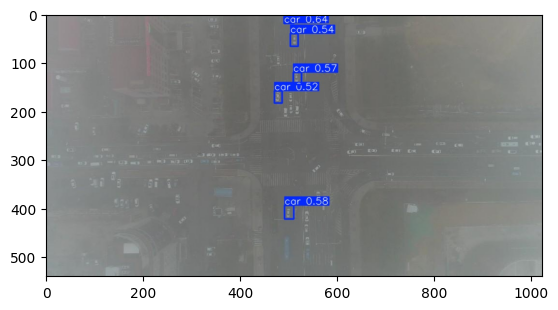

In [22]:
import matplotlib.pyplot as plt
# Test edilen bir görüntüyü görselleştir
image_path = '/content/runs/detect/predict/M0701_img000588.jpg'
img = plt.imread(image_path)
plt.imshow(img)
plt.show()

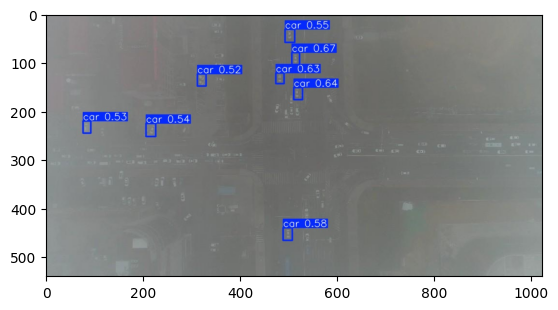

In [37]:
import matplotlib.pyplot as plt

image_path = '/content/runs/detect/predict/M0701_img000627.jpg'
img = plt.imread(image_path)
plt.imshow(img)
plt.show()

*   Yuakrıdaki görselde de görüldüğü üzere eğitilen YOLOv8 modeli yüksek irtifalı ve sisli İHA görüntülerinde arabaları tespit edememektedir.


